In [1]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap
from zenml.client import Client

artifact = Client().get_artifact_version('80c044bf-fb99-4bca-a60a-3088c79b3003')
documents = artifact.load()

Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
NumExpr defaulting to 8 threads.


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

embeddings = np.array([doc.embedding for doc in documents])
parent_sections = [doc.parent_section for doc in documents]

# Get unique parent sections
unique_parent_sections = list(set(parent_sections))

# Tol color palette
tol_colors = [
    "#4477AA",
    "#EE6677",
    "#228833",
    "#CCBB44",
    "#66CCEE",
    "#AA3377",
    "#BBBBBB",
]

# Create a colormap with Tol colors
tol_colormap = ListedColormap(tol_colors)

# Assign colors to each unique parent section
section_colors = tol_colors[: len(unique_parent_sections)]

# Create a dictionary mapping parent sections to colors
section_color_dict = dict(zip(unique_parent_sections, section_colors))


# Dimensionality reduction using t-SNE
def tsne_visualization(embeddings, parent_sections):
    tsne = TSNE(n_components=2, random_state=42)
    embeddings_2d = tsne.fit_transform(embeddings)

    plt.figure(figsize=(8, 8))
    for section in unique_parent_sections:
        if section in section_color_dict:
            mask = [section == ps for ps in parent_sections]
            plt.scatter(
                embeddings_2d[mask, 0],
                embeddings_2d[mask, 1],
                c=[section_color_dict[section]],
                label=section,
            )

    plt.title("t-SNE Visualization")
    plt.legend()
    plt.show()


# Dimensionality reduction using UMAP
def umap_visualization(embeddings, parent_sections):
    umap_2d = umap.UMAP(n_components=2, random_state=42)
    embeddings_2d = umap_2d.fit_transform(embeddings)

    plt.figure(figsize=(8, 8))
    for section in unique_parent_sections:
        if section in section_color_dict:
            mask = [section == ps for ps in parent_sections]
            plt.scatter(
                embeddings_2d[mask, 0],
                embeddings_2d[mask, 1],
                c=[section_color_dict[section]],
                label=section,
            )

    plt.title("UMAP Visualization")
    plt.legend()
    plt.show()

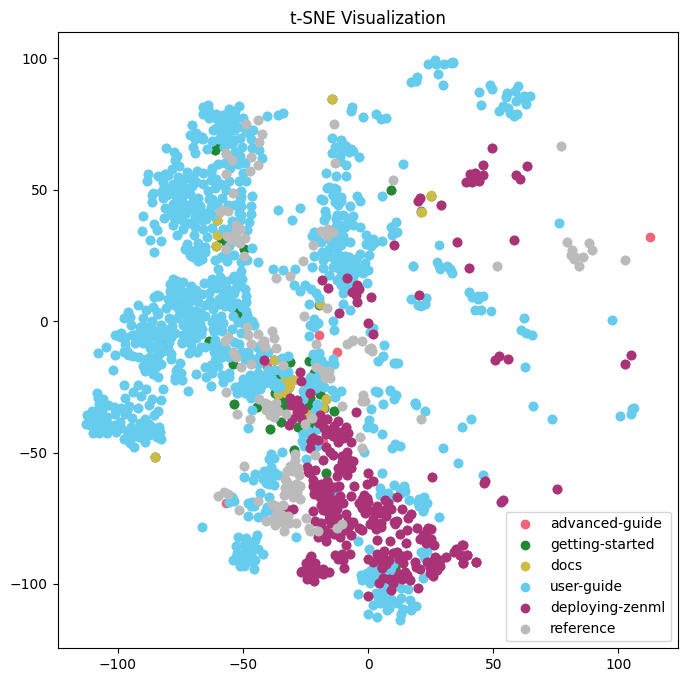

In [9]:
# Visualize embeddings using t-SNE
tsne_visualization(embeddings, parent_sections)

/Users/strickvl/.pyenv/versions/3.10.12/envs/complete-rag/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


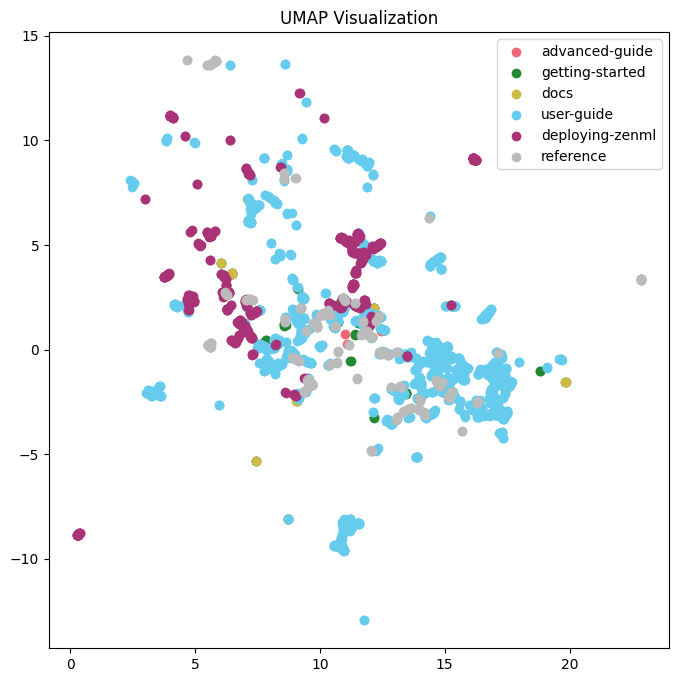

In [10]:
# Visualize embeddings using UMAP
umap_visualization(embeddings, parent_sections)